In [1]:
%matplotlib widget

In [2]:
from bmcs_cross_section.mkappa.mkappa import MKappa
from bmcs_cross_section.cs_design import TShape, BarLayer, CrossSectionDesign
import matplotlib.pyplot as plt
from bmcs_cross_section.matmod import PWLConcreteMatMod, EC2ConcreteMatMod
import numpy as np
import sympy as sp
import pandas as pd
sp.init_printing()
state_debug = True

In [3]:
mc = MKappa(name='moment-curvature', low_kappa=-0.000014, high_kappa=0.00003)

In [4]:
mc.matrix = 'piecewise linear'
css = mc.cross_section_shape = 'T-shape'
csl = mc.cross_section_layout
bl1 = BarLayer(name='steel 1', z=10, ds=10, count=2, state_change_debug=state_debug)
bl2 = BarLayer(name='steel 2', z=30, ds=10, count=2, state_change_debug=state_debug )
csl.add_layer(bl1)
csl.add_layer(bl2)

In [5]:
mc.state_change_debug=True
mc.matrix_.state_change_debug=True
mc.cross_section_layout.state_change_debug=True
mc.cross_section_shape_.state_change_debug=True

In [6]:
mc.cs_design.state_change_debug = True

In [7]:
mc.matrix_.E_cc=26003
mc.cross_section_layout['steel 1'].z = 20

value_changed <bmcs_cross_section.matmod.concrete.PWLConcreteMatMod object at 0x7f079ece3f90> TraitChangeEvent(object=<bmcs_cross_section.matmod.concrete.PWLConcreteMatMod object at 0x7f079ece3f90>, name='E_cc', old=25000, new=26003.0)
value_changed <bmcs_cross_section.cs_design.cs_design.CrossSectionDesign object at 0x7f07d2756180> Notification from child <bmcs_cross_section.matmod.concrete.PWLConcreteMatMod object at 0x7f079ece3f90>
value_changed <bmcs_cross_section.mkappa.mkappa.MKappa object at 0x7f07d1f9db30> Notification from child <bmcs_cross_section.cs_design.cs_design.CrossSectionDesign object at 0x7f07d2756180>
value_changed <bmcs_cross_section.cs_design.cs_reinf_layer.BarLayer object at 0x7f079ecdde00> TraitChangeEvent(object=<bmcs_cross_section.cs_design.cs_reinf_layer.BarLayer object at 0x7f079ecdde00>, name='z', old=10.0, new=20.0)
value_changed <bmcs_cross_section.cs_design.cs_layout_dict.CrossSectionLayout object at 0x7f079ece3180> Notification from child <bmcs_cross_se

In [8]:
mc.matrix_.E_ct = 23000

value_changed <bmcs_cross_section.matmod.concrete.PWLConcreteMatMod object at 0x7f079ece3f90> TraitChangeEvent(object=<bmcs_cross_section.matmod.concrete.PWLConcreteMatMod object at 0x7f079ece3f90>, name='E_ct', old=24000, new=23000.0)
value_changed <bmcs_cross_section.cs_design.cs_design.CrossSectionDesign object at 0x7f07d2756180> Notification from child <bmcs_cross_section.matmod.concrete.PWLConcreteMatMod object at 0x7f079ece3f90>
value_changed <bmcs_cross_section.mkappa.mkappa.MKappa object at 0x7f07d1f9db30> Notification from child <bmcs_cross_section.cs_design.cs_design.CrossSectionDesign object at 0x7f07d2756180>


In [9]:
mc.interact(figsize=(7,4),tight_layout=True)

# Inversion of the $M-\kappa$ curve

To enable the integration of curvature along the beam for a given moment $\kappa(M)$ relation is needed 
which is monotonically increasing. A general way of flattening and drops in the $M(\kappa)$ curve is provided below.

In [10]:
xdata = np.array([0,1,0.9, 0.8, 2])
ydata = np.array([0,1,2,3, 4])

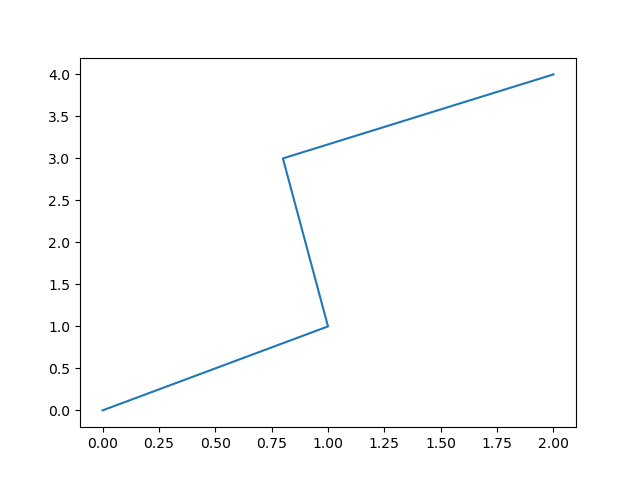

In [13]:
%matplotlib widget
plt.plot(xdata, ydata)

In [14]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [15]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [16]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [17]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [18]:
i_x = np.argmin(diffs, axis=1)

In [19]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

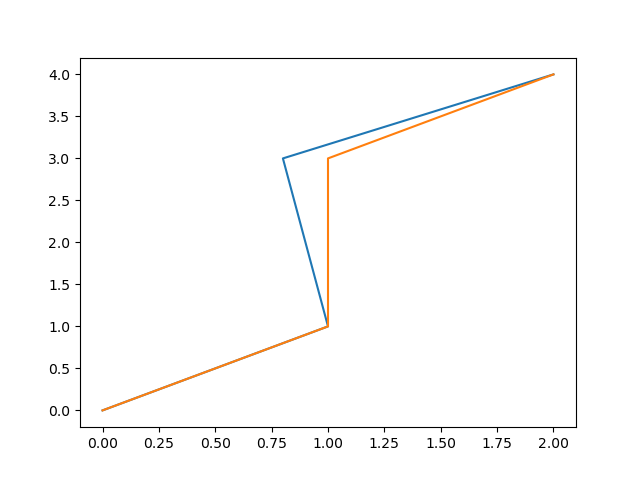

In [20]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [21]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [22]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [23]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [24]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [25]:
i_x = np.argmin(diffs, axis=1)

In [26]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

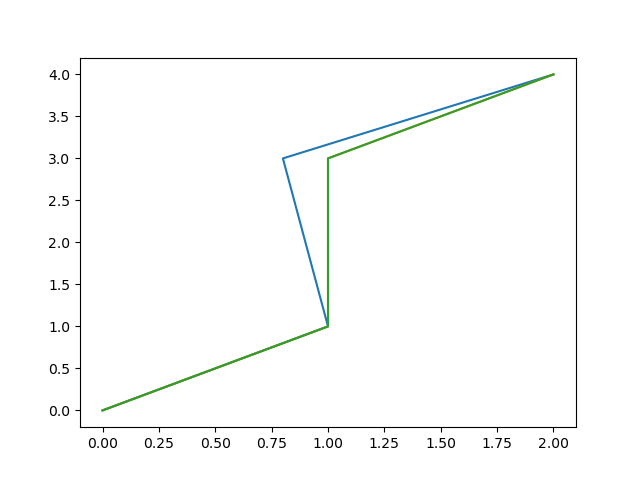

In [27]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [28]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [29]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [30]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [31]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [32]:
i_x = np.argmin(diffs, axis=1)

In [33]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

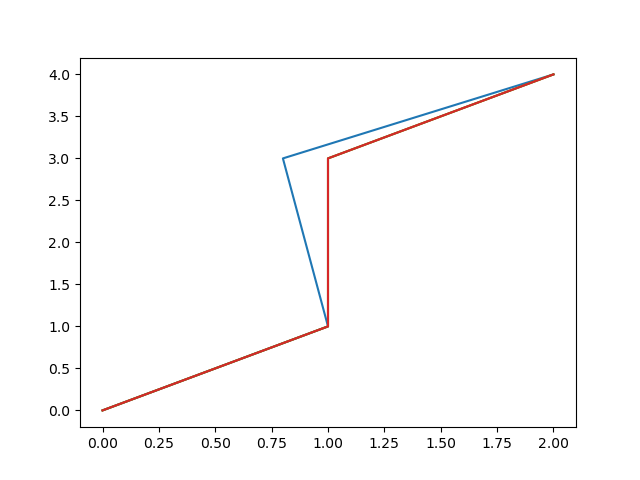

In [34]:
plt.plot(xdata[i_x], ydata)
plt.show()